## Car

In [3]:
using TrajectoryOptimization
using Plots, LinearAlgebra

┌ Info: Precompiling TrajectoryOptimization [c79d492b-0548-5874-b488-5a62c1d9d0ca]
└ @ Base loading.jl:1186


Load car problem

In [9]:
prob = copy(Problems.parallel_park);

Solve problem

In [15]:
solve!(prob, iLQRSolverOptions{Float64}(verbose=true)); # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     0.0362888238  0.00369591  0.073181  1         0e+00     0.00027   0.256577 0          
    2     0.0362153815  0.00320307  0.022929  1         0e+00     7.34e-05  0.231205 0          


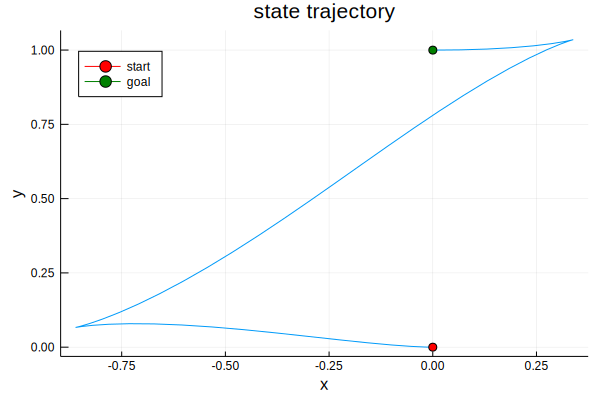

In [13]:
N = prob.N
x = [prob.X[k][1] for k = 1:N]
y = [prob.X[k][2] for k = 1:N]

plot(x,y,xlabel="x",ylabel="y",label="",title="state trajectory")
plot!((x[1],y[1]),marker=:circle,color=:red,label="start")
plot!((x[end],y[end]),marker=:circle,color=:green,label="goal",legend=:topleft)

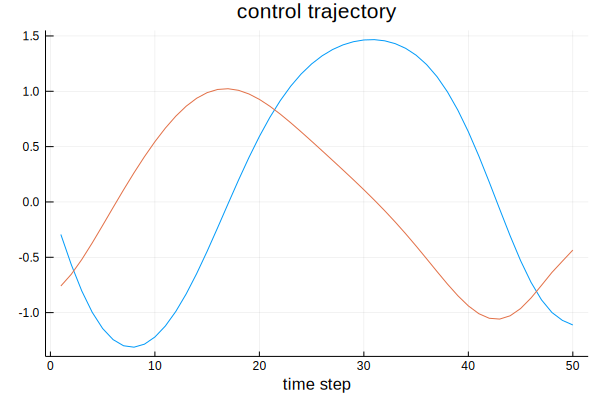

In [14]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")